<a href="https://colab.research.google.com/github/Samplergithub769/MNIST-Digit-Classification/blob/main/Handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST Handwritten Digit Clasification using Deep Learning (Convolutional Neural Network)

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 #OPENCV Library
from google.colab.patches import cv2_imshow
from PIL import Image #Pillow library(PIL)
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [199]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [200]:
type(X_train)

numpy.ndarray

In [201]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [202]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [203]:
print(X_train[10].shape)

(28, 28)


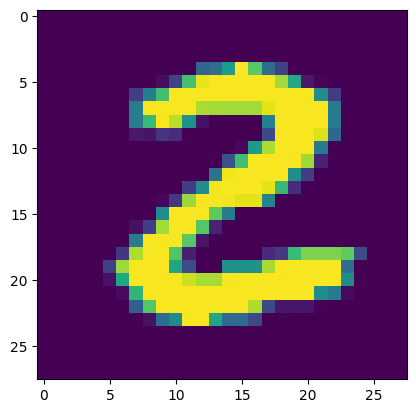

2


In [204]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

Image Lables

In [205]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [206]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [207]:
# scaling the values
X_train=X_train/255
X_test=X_test/255

In [208]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [209]:
#Reshape images
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)


In [210]:
print(X_train.shape,X_test.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1)


Building the CNN Model

In [211]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=25,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [212]:
model.summary() # get the summary of model

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 26, 26, 25)          │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 25)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 11, 11, 64)          │          14,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,452 (220.52 KB)

 Trainable params: 56,452 (220.52 KB)

 Non-trainable params: 0 (0.00 B)

In [213]:
# compiling the Convolutional Neural Network Model

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [214]:
# training the model

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.8496 - loss: 0.4750
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9744 - loss: 0.0816
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9814 - loss: 0.0592
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9865 - loss: 0.0434
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9893 - loss: 0.0353
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9913 - loss: 0.0292
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9924 - loss: 0.0230
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9933 - loss: 0.0203
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9946 - loss: 0.0161
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9956 - loss: 0.0139


Training data accuracy = 99.5%

In [215]:
model.save('handwritten.keras')

In [216]:
model=tf.keras.models.load_model('handwritten.keras')

Accuracy on Test data:

In [217]:
model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9812 - loss: 0.0748


[0.06121104210615158, 0.9843999743461609]

Test data accuracy = 98.4%

In [218]:
print(X_test.shape)

(10000, 28, 28, 1)


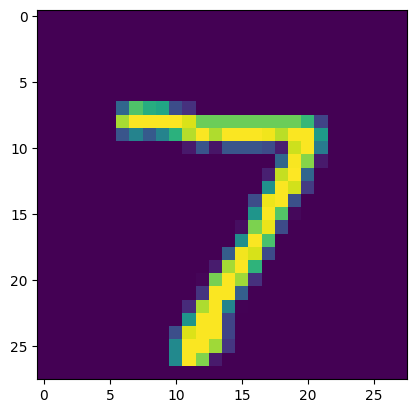

In [219]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [220]:
print(Y_test[0])

7


In [221]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [222]:
print(Y_pred.shape)

(10000, 10)


In [223]:
print(Y_pred[0])

[1.01093744e-09 1.27360895e-08 8.46826553e-10 1.12601541e-07
 1.27236521e-09 6.03435865e-07 9.55040761e-14 9.99999225e-01
 3.19094862e-10 2.41390428e-08]


In [224]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [225]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 2, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 9, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 5, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

In [226]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [227]:
print(conf_mat)

tf.Tensor(
[[ 947    1    2    0    4    4   10    1    1   10]
 [   0 1128    0    5    0    1    1    0    0    0]
 [   0    0 1010    7    1    0    1   11    1    1]
 [   0    0    0 1005    0    4    0    0    1    0]
 [   0    0    0    0  978    0    1    0    0    3]
 [   1    0    0    5    0  883    1    1    0    1]
 [   2    2    0    1    3    5  944    0    1    0]
 [   0    2    9    6    0    0    0 1000    2    9]
 [   0    1    1    6    1    2    0    0  956    7]
 [   0    0    0    0    4    8    1    2    1  993]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

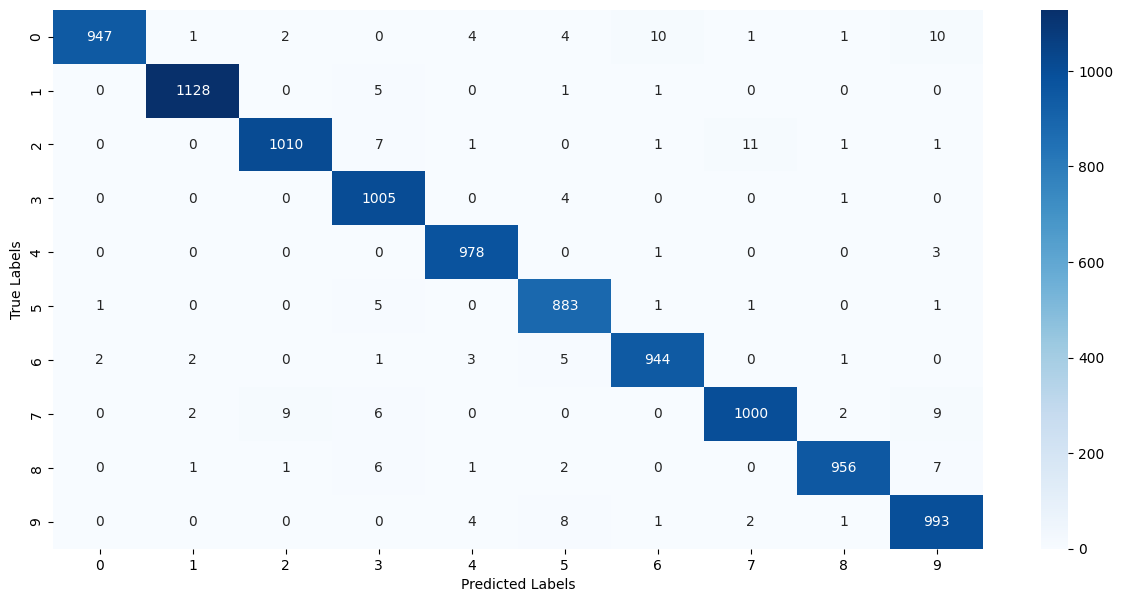

In [228]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [229]:
input_image_path='/content/MNIST_digit.png'

In [230]:
input_image=cv2.imread(input_image_path)

In [231]:
type(input_image)

numpy.ndarray

In [232]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


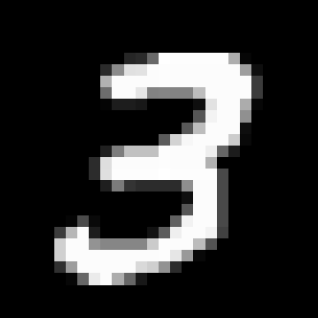

In [233]:
cv2_imshow(input_image)

In [234]:
input_image.shape

(318, 318, 3)

In [235]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [236]:
grayscale.shape

(318, 318)

In [237]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [238]:
input_image_resize.shape

(28, 28)

In [239]:
cv2_imshow(input_image_resize)

In [240]:
input_image_resize=input_image_resize/255


In [241]:
type(input_image_resize)

numpy.ndarray

In [242]:
image_reshaped = np.reshape(input_image_resize, [1,28,28,1])
# Adding the channel dimension to the reshape operation
# The new shape [1, 28, 28, 1] represents a batch of 1 image,
# with dimensions 28x28 and 1 channel.

input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[4.8064034e-17 3.5807962e-15 6.4711530e-17 1.0000000e+00 5.9093694e-22
  8.8509609e-09 1.3104522e-19 1.0489109e-15 2.4713375e-13 1.8189908e-15]]


In [243]:
input_pred_label = np.argmax(input_prediction)

In [244]:
print(input_pred_label)

3


Predictive System

Path of the image to be predicted: /content/MNIST_digit.png


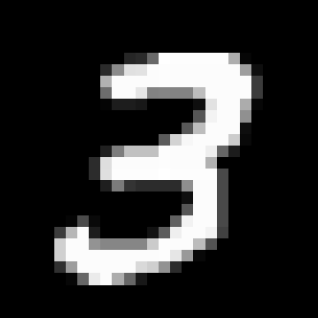

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The Handwritten Digit is recognised as  3


In [245]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28,1])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)